In [1]:
import os, matplotlib.pyplot as plt, joblib, copy, pandas as pd
os.environ["OMP_NUM_THREADS"] = "1"
# useful on linux to avoid numpy multithreading
 
import numpy as np

# import the class definition from the 1st step
from step1_data_preparation import CustomPreprocessor

#### **1. Load the data and predictions**

In [2]:
# Path to the prepared data folder
prepared_data_path=os.path.expanduser('~/data/srnn_data/MPI-ESM')
CP = joblib.load(os.path.join(prepared_data_path,'CP.jpkl'))
pcs,kpcs,init_length = joblib.load(os.path.join(prepared_data_path,'training_data.jpkl'))
evaluation_pcs, evaluation_kpcs,init_length = joblib.load(os.path.join(prepared_data_path,'evaluation_data.jpkl'))

In [3]:
predicted_pcs_a,predicted_kpcs_a = joblib.load('predicted_data_4a.jpkl')
predicted_kpcs_b = joblib.load('predicted_data_4b.jpkl')

#### **Plot observed and emulated distributions of Kernel PCs**

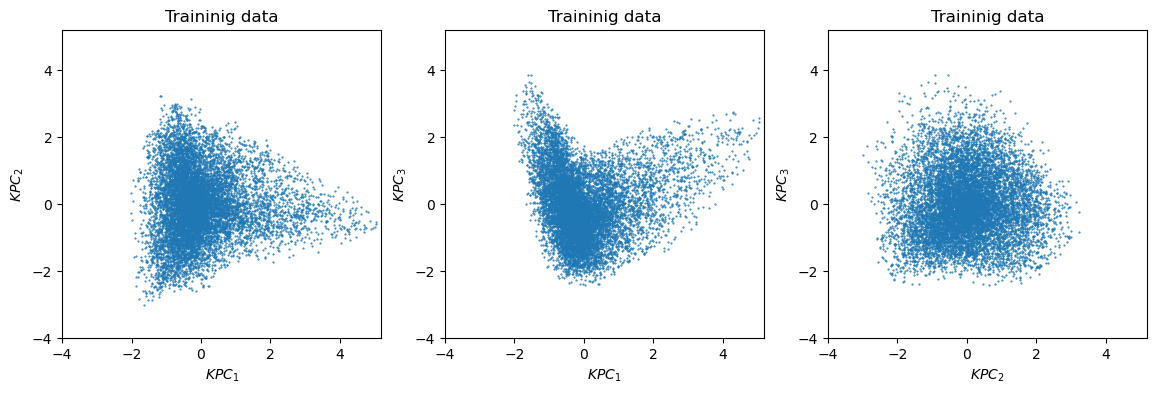

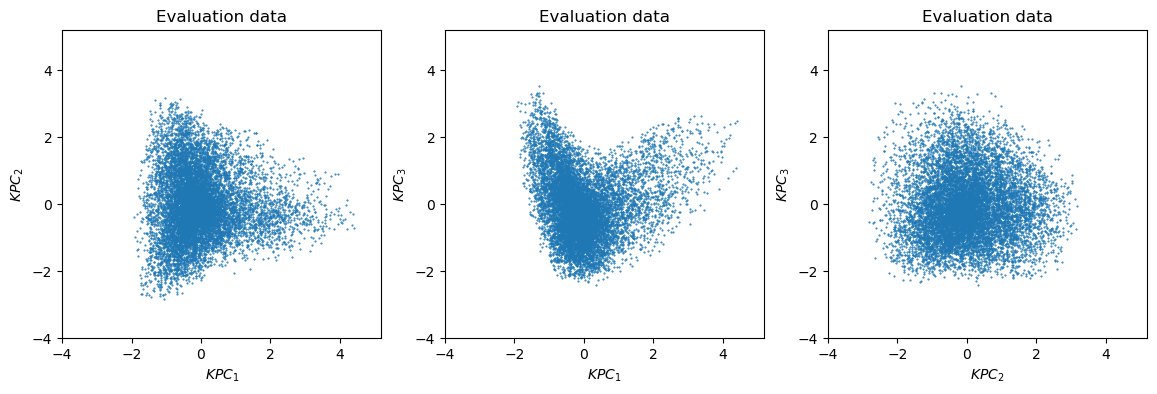

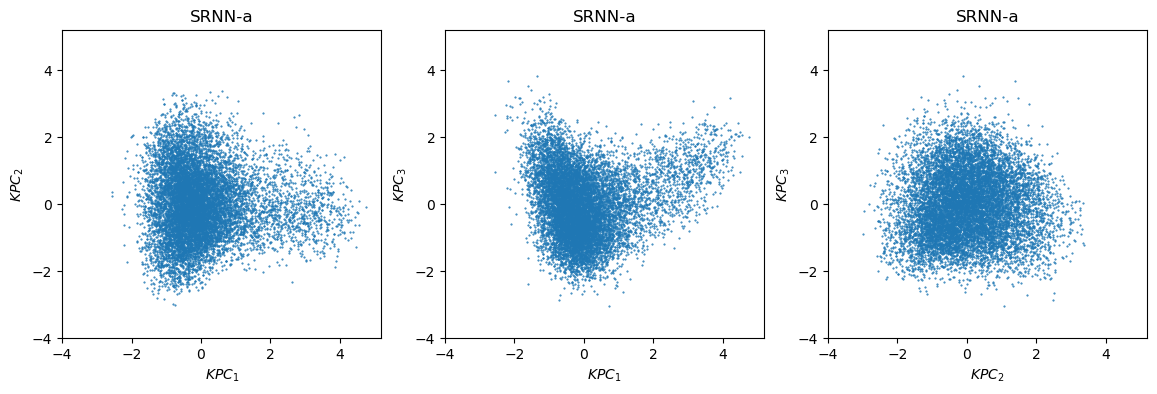

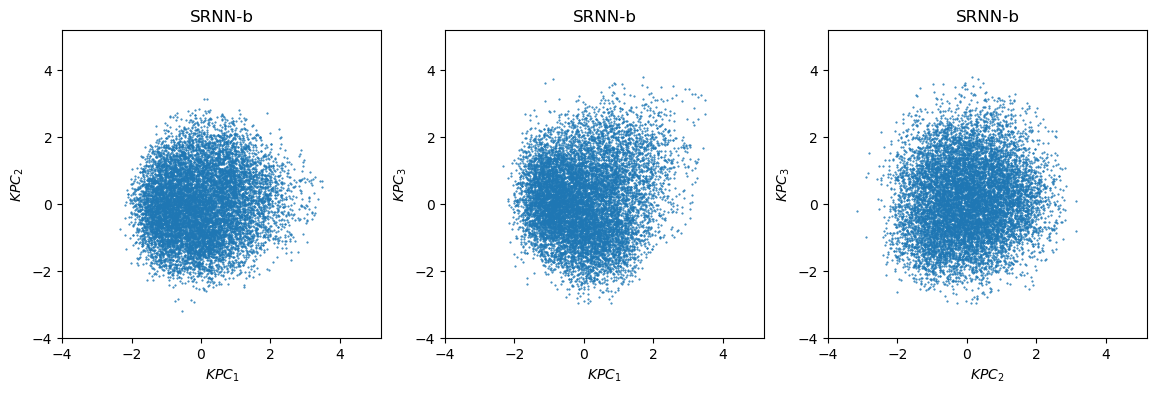

In [4]:
fig, axs = plt.subplots(1,3,figsize=(14,4))
k=0
for i in range(3):
    for j in range(i+1,3):
        ax=axs[k]
        k+=1
        ax.plot(kpcs[:,init_length:, i].flatten(), kpcs[:,init_length:, j].flatten(),'.',markersize=1)
        ax.set_xlabel(f"$KPC_{i+1}$")
        ax.set_ylabel(f"$KPC_{j+1}$")
        ax.set_title('Traininig data')
        ax.set_xlim(-4,5.2)
        ax.set_ylim(-4,5.2)
plt.show()

fig, axs = plt.subplots(1,3,figsize=(14,4))
k=0
for i in range(3):
    for j in range(i+1,3):
        ax=axs[k]
        k+=1
        ax.plot(evaluation_kpcs[:,init_length:, i].flatten(), evaluation_kpcs[:,init_length:, j].flatten(),'.',markersize=1)
        ax.set_xlabel(f"$KPC_{i+1}$")
        ax.set_ylabel(f"$KPC_{j+1}$")
        ax.set_title('Evaluation data')
        ax.set_xlim(-4,5.2)
        ax.set_ylim(-4,5.2)        
plt.show()

fig, axs = plt.subplots(1,3,figsize=(14,4))
k=0
for i in range(3):
    for j in range(i+1,3):
        ax=axs[k]
        k+=1
        ax.plot(predicted_kpcs_a[:,:, i].flatten(), predicted_kpcs_a[:,:, j].flatten(),'.',markersize=1)
        ax.set_xlabel(f"$KPC_{i+1}$")
        ax.set_ylabel(f"$KPC_{j+1}$")
        ax.set_title('SRNN-a')
        ax.set_xlim(-4,5.2)
        ax.set_ylim(-4,5.2)        
plt.show()

fig, axs = plt.subplots(1,3,figsize=(14,4))
k=0
for i in range(3):
    for j in range(i+1,3):
        ax=axs[k]
        k+=1
        ax.plot(predicted_kpcs_b[:,:, i].flatten(), predicted_kpcs_b[:,:, j].flatten(),'.',markersize=1)
        ax.set_xlabel(f"$KPC_{i+1}$")
        ax.set_ylabel(f"$KPC_{j+1}$")
        ax.set_title('SRNN-b')
        ax.set_xlim(-4,5.2)
        ax.set_ylim(-4,5.2)        
plt.show()

#### **Plot observed and SRNN-a emulated relations of PCs and Kernel PCs (check that the PC - Kernel PC mapping is captured)**

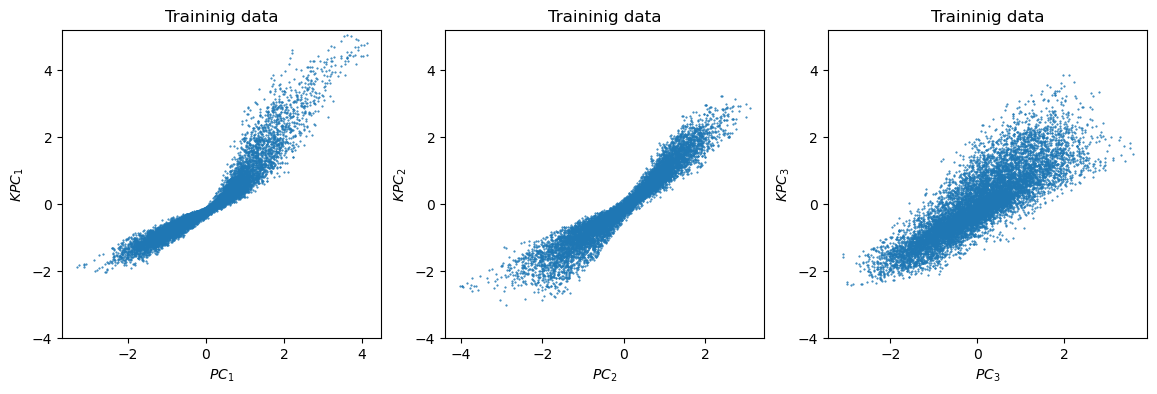

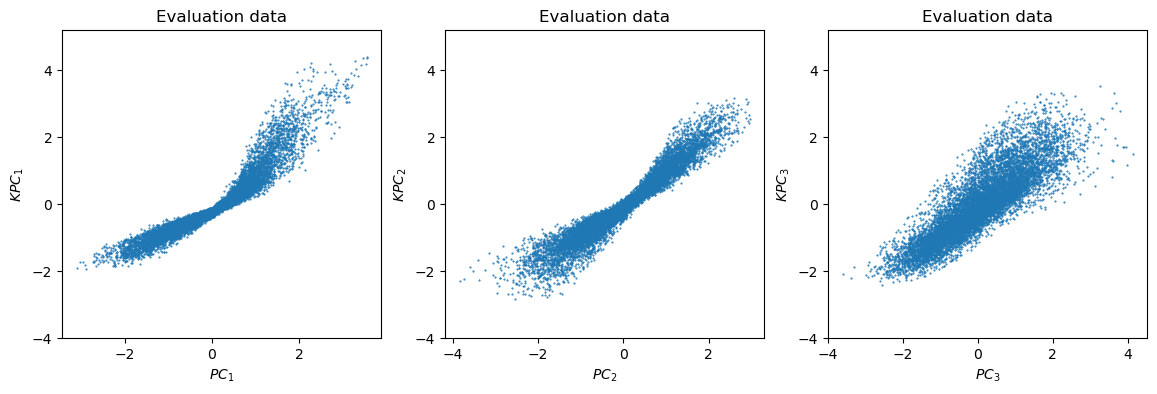

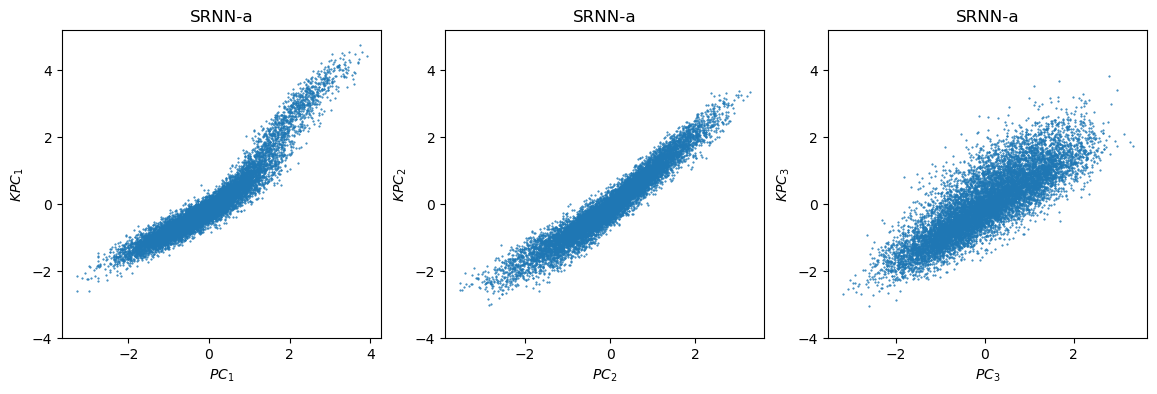

In [5]:
fig, axs = plt.subplots(1,3,figsize=(14,4))
k=0
for i in range(3):
    for j in [i]:
        ax=axs[k]
        k+=1
        ax.plot(pcs[:,init_length:, i].flatten(), kpcs[:,init_length:, j].flatten(),'.',markersize=1)
        ax.set_xlabel(f"$PC_{i+1}$")
        ax.set_ylabel(f"$KPC_{j+1}$")
        ax.set_title('Traininig data')
        #ax.set_xlim(-4,5.2)
        ax.set_ylim(-4,5.2)
plt.show()

fig, axs = plt.subplots(1,3,figsize=(14,4))
k=0
for i in range(3):
    for j in [i]:
        ax=axs[k]
        k+=1
        ax.plot(evaluation_pcs[:,init_length:, i].flatten(), evaluation_kpcs[:,init_length:, j].flatten(),'.',markersize=1)
        ax.set_xlabel(f"$PC_{i+1}$")
        ax.set_ylabel(f"$KPC_{j+1}$")
        ax.set_title('Evaluation data')
        #ax.set_xlim(-4,5.2)
        ax.set_ylim(-4,5.2)        
plt.show()

fig, axs = plt.subplots(1,3,figsize=(14,4))
k=0
for i in range(3):
    for j in [i]:
        ax=axs[k]
        k+=1
        ax.plot(predicted_pcs_a[:,:, i].flatten(), predicted_kpcs_a[:,:, j].flatten(),'.',markersize=1)
        ax.set_xlabel(f"$PC_{i+1}$")
        ax.set_ylabel(f"$KPC_{j+1}$")
        ax.set_title('SRNN-a')
        #ax.set_xlim(-4,5.2)
        ax.set_ylim(-4,5.2)        
plt.show()

#### **Plot short-term prediction skill**

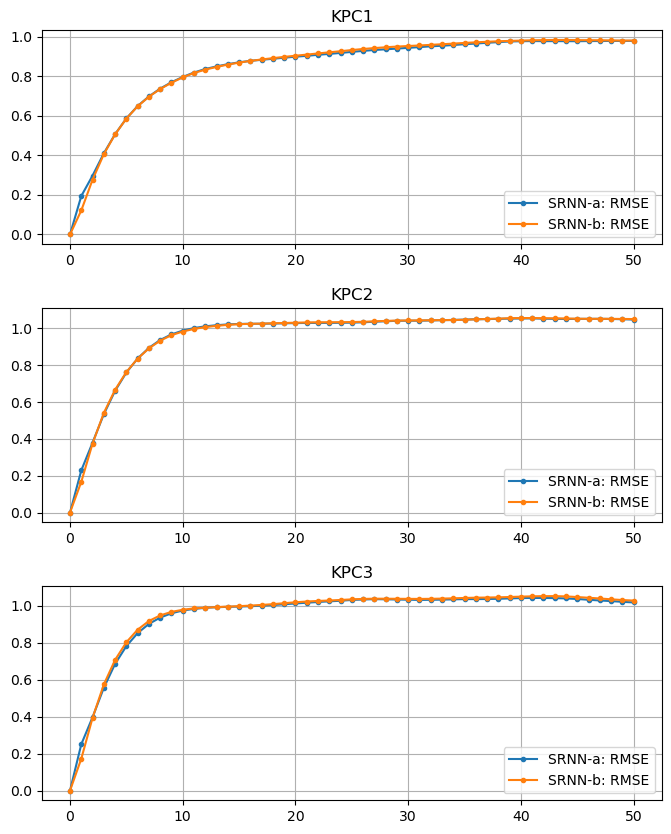

In [6]:
all_predicted_pcs,all_predicted_kpcs,all_observed_pcs,all_observed_kpcs=joblib.load('predicted_data_short_4a.jpkl')
errors=all_predicted_kpcs-all_observed_kpcs
evaluation_data_mse_a=(errors**2).mean(axis=(0,1))

all_predicted_kpcs,all_observed_kpcs=joblib.load('predicted_data_short_4b.jpkl')
errors=all_predicted_kpcs-all_observed_kpcs
evaluation_data_mse_b=(errors**2).mean(axis=(0,1))

nkpcs=evaluation_data_mse_a.shape[-1]
fig, axs = plt.subplots(nkpcs,1,figsize=(8,10))
fig.subplots_adjust(hspace=0.3)
for i in range(nkpcs):
    ax=axs[i]
    ax.set_title('KPC%d'%(i+1))
    #ax.plot(np.sqrt(training_data_mse[:,i]),'.-',label='training set RMSE')
    ax.plot(np.sqrt(evaluation_data_mse_a[:,i]),'.-',label='SRNN-a: RMSE')
    ax.plot(np.sqrt(evaluation_data_mse_b[:,i]),'.-',label='SRNN-b: RMSE')
    ax.legend()
    ax.grid(True)
plt.show()    
plt.close(fig) 

#### **Plot predictions vs. observations & difference in errors at specific lead time (pay attention to extreme events/tails)**

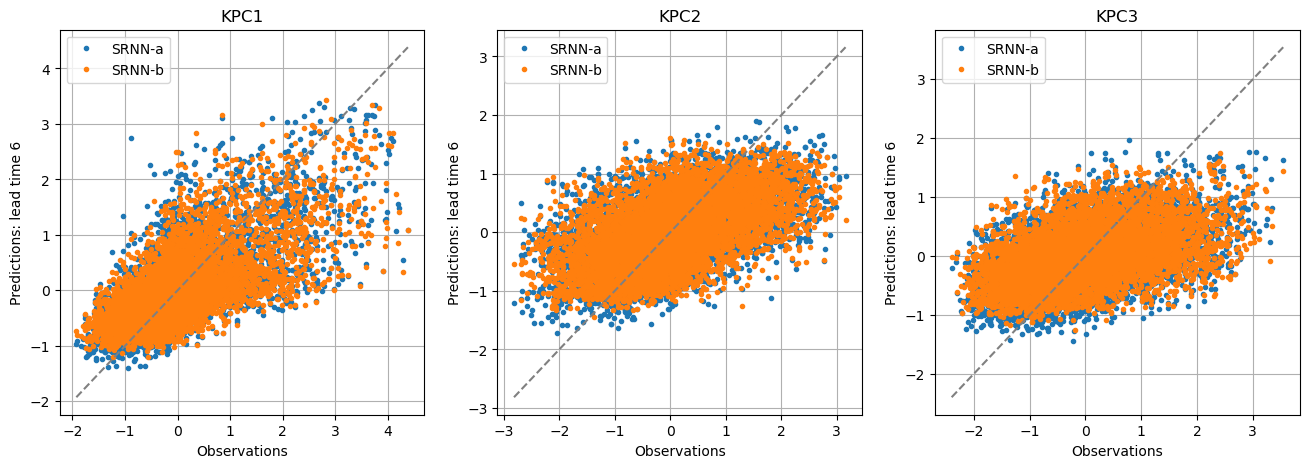

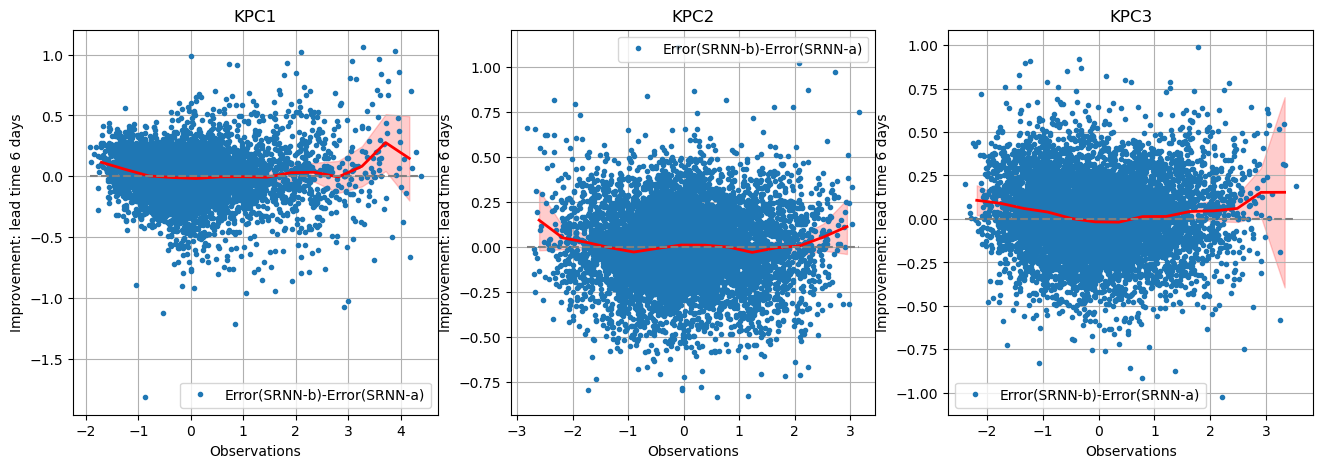

In [7]:
all_predicted_pcs,all_predicted_kpcs_a,all_observed_pcs,all_observed_kpcs_a=joblib.load('predicted_data_short_4a.jpkl')
all_predicted_kpcs_b,all_observed_kpcs_b=joblib.load('predicted_data_short_4b.jpkl')
t=6

nkpcs=evaluation_data_mse_a.shape[-1]
fig, axs = plt.subplots(1,nkpcs,figsize=(16,5))
fig.subplots_adjust(hspace=0.3)
for i in range(nkpcs):
    ax=axs[i]
    ax.set_title('KPC%d'%(i+1))
    #ax.plot(np.sqrt(training_data_mse[:,i]),'.-',label='training set RMSE')
    ax.plot(all_observed_kpcs_a[...,t,i].flatten(),all_predicted_kpcs_a[...,t,i].flatten(),'.',label='SRNN-a')
    ax.plot(all_observed_kpcs_b[...,t,i].flatten(),all_predicted_kpcs_b[...,t,i].flatten(),'.',label='SRNN-b')
    xx=np.linspace(np.amin(all_observed_kpcs_a[...,t,i]),np.amax(all_observed_kpcs_a[...,t,i]))
    ax.plot(xx,xx,'--',color='gray')
    ax.set_xlabel('Observations')
    ax.set_ylabel(f'Predictions: lead time {t}')
    ax.legend()
    ax.grid(True)
plt.show()    
plt.close(fig) 

fig, axs = plt.subplots(1,nkpcs,figsize=(16,5))
fig.subplots_adjust(hspace=0.3)
for i in range(nkpcs):
    ax=axs[i]
    ax.set_title('KPC%d'%(i+1))
    #ax.plot(np.sqrt(training_data_mse[:,i]),'.-',label='training set RMSE')

    x=all_observed_kpcs_a[...,t,i].flatten()
    y=np.abs(all_predicted_kpcs_b[...,t,i].flatten()-all_observed_kpcs_b[...,t,i].flatten())-np.abs(all_predicted_kpcs_a[...,t,i].flatten()-all_observed_kpcs_a[...,t,i].flatten())
    
    bins = np.linspace(x.min(), x.max(), 15)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    y_mean, y_sem = [], []

    for j in range(len(bins) - 1):
        yb = y[(x >= bins[j]) & (x < bins[j+1])]
        if len(yb):
            y_mean.append(yb.mean())
            y_sem.append(3*yb.std(ddof=1) / np.sqrt(len(yb)))
    ax.plot(x,y,'.',label='Error(SRNN-b)-Error(SRNN-a)')
    ax.plot(bin_centers[:len(y_mean)], y_mean, 'r-', lw=2)
    ax.fill_between(bin_centers[:len(y_mean)],
                 np.array(y_mean) - np.array(y_sem),
                 np.array(y_mean) + np.array(y_sem),
                 color='r', alpha=0.2)
    
    xx=np.linspace(np.amin(all_observed_kpcs_a[...,t,i]),np.amax(all_observed_kpcs_a[...,t,i]))
    ax.plot(xx,xx*0,'--',color='gray')
    ax.set_xlabel('Observations')
    ax.set_ylabel(f'Improvement: lead time {t} days')
    ax.legend()
    ax.grid(True)
plt.show()    
plt.close(fig) 

#### **Some conclusions**

- SRNN-a better captures the distribution tails for kernel PCs
- SRNN-a captures nonlinear relations between PCs and Kernel PCs
- Short term predictions are comparable, with signs of better accuracy of extreme event prediction for SRNN-a with increasing lead time. 

#### **Possible TODOs**

- It is possible to assess predicted probabilities of extreme events separately